In [70]:
#Loading the data and other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
# might be needed depending on your version of Jupyter

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<AxesSubplot:xlabel='loan_status', ylabel='count'>

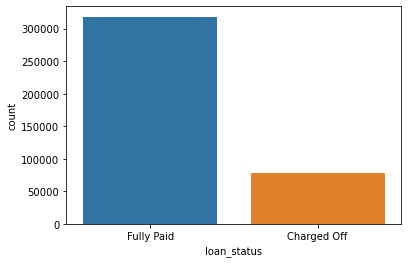

In [4]:
#distribution of our target variable
sns.countplot(x="loan_status",data=df)

<AxesSubplot:xlabel='loan_amnt'>

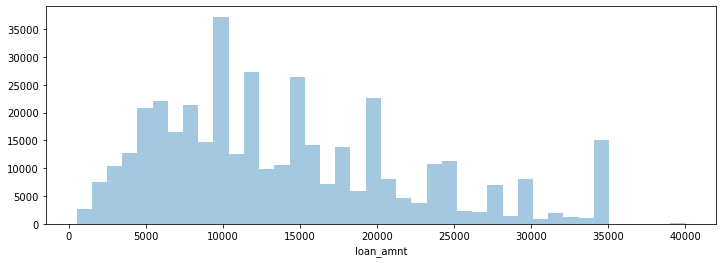

In [5]:
#distribution of loan amount
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"],kde=False,bins=40)

<AxesSubplot:>

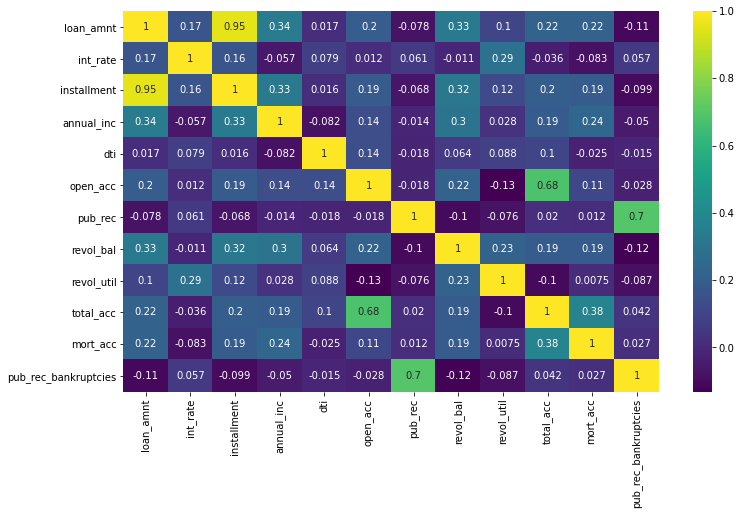

In [6]:
# Visualising correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

Observation
Here we can see that loan installment is correlated to to our loan amount and the reason being loan installment is calculated using some kind of formula which is calculated on the loan amount

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

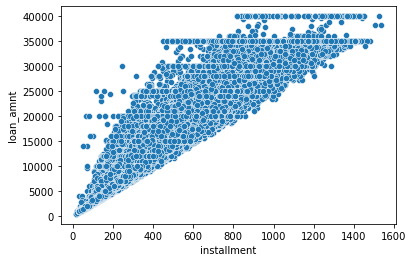

In [7]:
#creating scatter plot of installment and loan amount
sns.scatterplot(x="installment",y="loan_amnt",data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

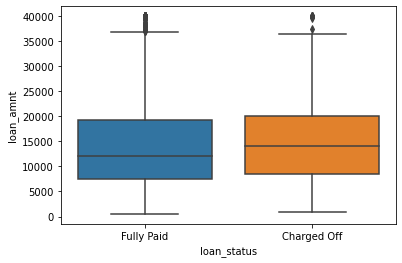

In [8]:
# creating boxplot 
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

In [9]:
# checking mean value of loan approved 
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [10]:
#checking unique values of grade
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [11]:
#checking unique values for subgrade
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

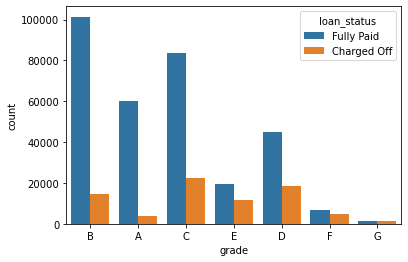

In [12]:
#checking plot for grade
sns.countplot(x="grade",hue="loan_status",data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

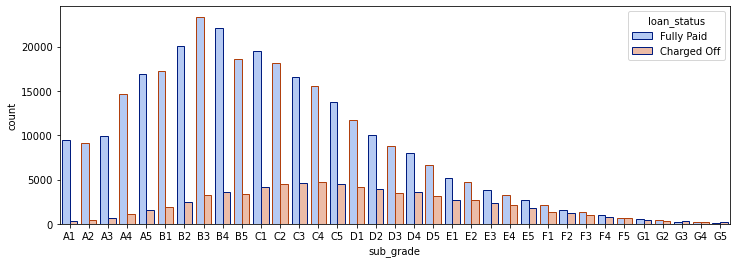

In [13]:
# Creating sub grade plot
plt.figure(figsize=(12,4))
sub_order=sorted(df["sub_grade"].unique())
sns.countplot(x='sub_grade',data=df,order=sub_order,palette="coolwarm",hue="loan_status",
              edgecolor=sns.color_palette("dark", 2))

In [14]:
#replacing fully paid with one and charge off as 0
df["loan_status"]=df["loan_status"].apply(lambda x : 1 if x=="Fully Paid" else 0)

<AxesSubplot:>

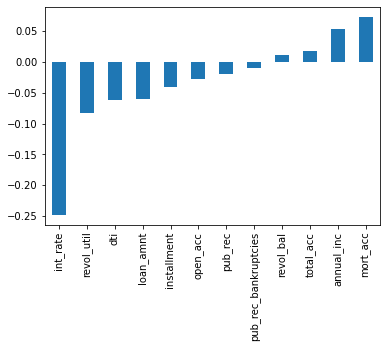

In [15]:
#creating corelation plot
df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

<AxesSubplot:xlabel='verification_status', ylabel='count'>

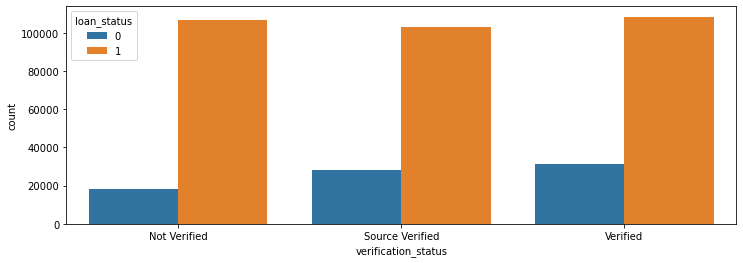

In [16]:
#verification status graph
plt.figure(figsize=(12,4))
sns.countplot(x="verification_status",data=df,hue="loan_status")

# Missing Data

In [17]:
#checking missing values in %
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [18]:
df["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
turner industries group       1
JEGS                          1
Telemetry tec                 1
clinicallab scientist         1
American Bank                 1
Name: emp_title, Length: 173105, dtype: int64

In [19]:
#dropping the emp title since too many professions are there
df.drop("emp_title",axis=1,inplace=True)

In [20]:
#checking unique values in employ length
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [21]:
#creating an ordered list of employes
emp_order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

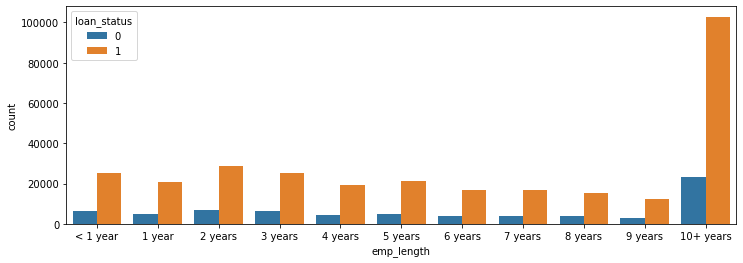

In [22]:
#creating employ length count plot setting hue as loan status
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length",data=df,order=emp_order,hue="loan_status")

In [23]:
#count of people those who didnt pay considering there emp length
emp_co=df[df["loan_status"]==0].groupby("emp_length").count()["loan_status"]

#count of people those who did pay considering there emp length
emp_fp=df[df["loan_status"]==1].groupby("emp_length").count()["loan_status"]

<AxesSubplot:xlabel='emp_length'>

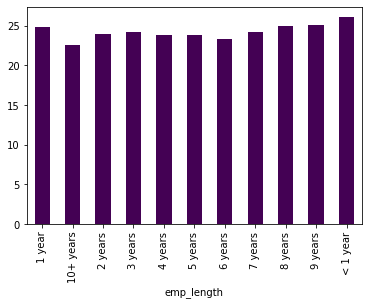

In [24]:
# % of people whoc didnt pay there loan considering there emp length
co_pre=emp_co*100/emp_fp

co_pre.plot(kind="bar",colormap="viridis")

In [25]:
#hence dropping emp length
df.drop("emp_length",axis=1,inplace=True)

In [26]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [27]:
df["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [28]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [29]:
#since reflecting the same information hence dropping the column
df.drop("title",inplace=True,axis=1)

In [30]:
#mortage accounts count
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [31]:
#filling the mortage value
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [32]:
df["mort_acc"]=df["mort_acc"].fillna(np.mean(df["mort_acc"]))

In [33]:
#dropping remaining data
df.dropna(inplace=True)

In [34]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [35]:
#converting 36 mont to 36 numeric and same for 60
df["term"]=df["term"].apply(lambda x:int(x[:3]))

In [36]:
# dropping dropping grade
df.drop("grade",axis=1,inplace=True)

In [37]:
#converting the sub grade into dummy variables
dummies=pd.get_dummies(df["sub_grade"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("sub_grade",axis=1),dummies],axis=1)

In [38]:
#doing same thing for other categorical variables
dummies=pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)


In [39]:
#checking the home ownership
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [40]:
#replacing none and any with other
df["home_ownership"]=df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [41]:
#dropping and adding 
dummies=pd.get_dummies(df["home_ownership"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("home_ownership",axis=1),dummies],axis=1)

In [42]:
#grabbing only last zip code of the address
df["Zip"]=df["address"].apply(lambda x:x[-5:])

In [43]:
#getting value counts to verify whether to convert into dummy or not
df["Zip"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: Zip, dtype: int64

In [44]:
#converting into dummy variable
dummies=pd.get_dummies(df["Zip"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("Zip",axis=1),dummies],axis=1)

In [45]:
#dropping address column
df.drop("address",axis=1,inplace=True)

In [46]:
#dropping issue date
df.drop("issue_d",axis=1,inplace=True)

In [47]:
#earliesr cr line extracting the year only
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

In [48]:
#sampling the data
data=df.sample(frac=.5,random_state=101)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
#scaling the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
#running model
#creating model 
model = Sequential()

#adding layer
model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

#parameters for early stopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

In [55]:
#running the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
618/618 [==============================] - 1s 2ms/step - loss: 0.3334 - val_loss: 0.2671
Epoch 2/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2724 - val_loss: 0.2636
Epoch 3/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2668 - val_loss: 0.2624
Epoch 4/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2652 - val_loss: 0.2634
Epoch 5/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2639 - val_loss: 0.2613
Epoch 6/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2629 - val_loss: 0.2622
Epoch 7/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2623 - val_loss: 0.2617
Epoch 8/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2616 - val_loss: 0.2604
Epoch 9/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2614 - val_loss: 0.2603
Epoch 10/25
618/618 [==============================] - 1s 1ms/step - loss: 0.2604 - val_loss: 0.2607

<AxesSubplot:>

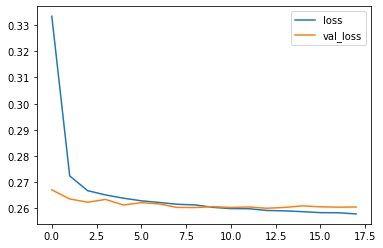

In [56]:
#plotting the losses
loss=pd.DataFrame(model.history.history)

loss.plot()

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

predict=model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60      7947
           1       0.88      1.00      0.93     31575

    accuracy                           0.89     39522
   macro avg       0.93      0.72      0.77     39522
weighted avg       0.90      0.89      0.87     39522



In [58]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60      7947
           1       0.88      1.00      0.93     31575

    accuracy                           0.89     39522
   macro avg       0.93      0.72      0.77     39522
weighted avg       0.90      0.89      0.87     39522



In [59]:
pd.DataFrame(confusion_matrix(y_test,predict))

,0,1
0,3456,4491
1,26,31549


In [60]:
#trying other Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf=[LinearSVC(),
     LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
     GaussianNB(),
     RandomForestClassifier(random_state=0,n_estimators=10)]

In [62]:
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))

In [63]:
for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.98      0.44      0.61      7947
           1       0.88      1.00      0.93     31575

    accuracy                           0.89     39522
   macro avg       0.93      0.72      0.77     39522
weighted avg       0.90      0.89      0.87     39522

              precision    recall  f1-score   support

           0       0.96      0.46      0.62      7947
           1       0.88      0.99      0.93     31575

    accuracy                           0.89     39522
   macro avg       0.92      0.73      0.78     39522
weighted avg       0.89      0.89      0.87     39522

              precision    recall  f1-score   support

           0       0.70      0.57      0.63      7947
           1       0.90      0.94      0.92     31575

    accuracy                           0.86     39522
   macro avg       0.80      0.75      0.77     39522
weighted avg       0.86      0.86      0.86     39522

              preci

In [64]:
#creating function which samples equal classes
def sampling_k_elements(group, k=77000):
    if len(group) < k:
        return group
    return group.sample(k)

data = df.groupby('loan_status').apply(sampling_k_elements).reset_index(drop=True)
data=shuffle(data)

In [65]:
#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#scaling the data
#scaling the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [66]:
#running the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3668 - val_loss: 0.3596
Epoch 2/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3617 - val_loss: 0.3608
Epoch 3/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3605 - val_loss: 0.3590
Epoch 4/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3598 - val_loss: 0.3588
Epoch 5/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3583 - val_loss: 0.3599
Epoch 6/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3584 - val_loss: 0.3595
Epoch 7/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3576 - val_loss: 0.3581
Epoch 8/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3571 - val_loss: 0.3590
Epoch 9/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3566 - val_loss: 0.3588
Epoch 10/25
482/482 [==============================] - 1s 1ms/step - loss: 0.3559 - val_loss: 0.3589

<AxesSubplot:>

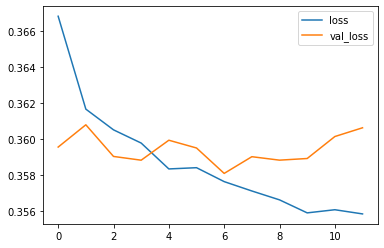

In [67]:
#plotting the losses
loss=pd.DataFrame(model.history.history)

loss.plot()

In [68]:
predict=model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     15546
           1       0.78      0.82      0.80     15254

    accuracy                           0.80     30800
   macro avg       0.80      0.80      0.80     30800
weighted avg       0.80      0.80      0.80     30800



In [69]:
for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     15546
           1       0.81      0.79      0.80     15254

    accuracy                           0.81     30800
   macro avg       0.81      0.81      0.81     30800
weighted avg       0.81      0.81      0.81     30800

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     15546
           1       0.81      0.79      0.80     15254

    accuracy                           0.80     30800
   macro avg       0.80      0.80      0.80     30800
weighted avg       0.80      0.80      0.80     30800

              precision    recall  f1-score   support

           0       0.89      0.57      0.69     15546
           1       0.68      0.93      0.79     15254

    accuracy                           0.75     30800
   macro avg       0.79      0.75      0.74     30800
weighted avg       0.79      0.75      0.74     30800

              preci